In [4]:
import scanpy as sc

### Loading the ground truth vectors

In [1]:
##


### Alevin ground truht 
import scanpy as sc
adata_av = sc.read_h5ad("/data/dagyeman/af_test_workdir/pbmc1k_quant/af_quant/alevin/quants.h5ad")
print(adata_av)


### Cellranger ground truth
fpath = '/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/results_auto/outs/filtered_feature_bc_matrix'  # 1k
adata_cr = sc.read_10x_mtx(fpath)
print(adata_cr)

### UMI length 12
adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/adata_12.h5ad")
adata_12

AnnData object with n_obs × n_vars = 72199 × 36601
    obs: 'barcodes', 'corrected_reads', 'mapped_reads', 'deduplicated_reads', 'mapping_rate', 'dedup_rate', 'mean_by_max', 'num_genes_expressed', 'num_genes_over_mean'
    var: 'gene_id', 'gene_symbol'
    uns: 'collate_info', 'gpl_info', 'quant_info', 'simpleaf_map_info'
    layers: 'ambiguous', 'spliced', 'unspliced'
AnnData object with n_obs × n_vars = 1232 × 36601
    var: 'gene_ids', 'feature_types'


AnnData object with n_obs × n_vars = 1232 × 28227

### Comparing adata_cr and adata_12

In [2]:
# Identify intersection of gene names
common_genes = adata_cr.var_names.intersection(adata_12.var_names)

# Use common genes
adata_cr_sub = adata_cr[:, common_genes].copy()
adata_12_sub = adata_12[:, common_genes].copy()

# Verify Shape
print(adata_cr_sub.shape)   
print(adata_12_sub.shape)  

(1232, 26730)
(1232, 26730)


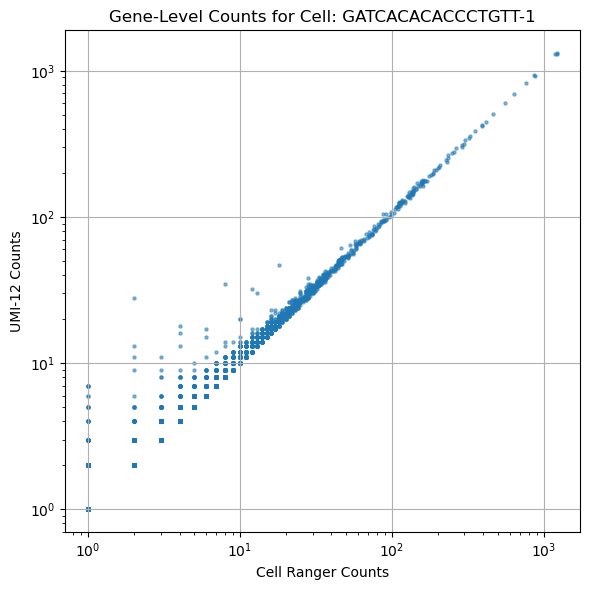

In [3]:
### Counts of adata_cr  vs adata_12

import matplotlib.pyplot as plt

# Define the barcode of interest
barcode = "GATCACACACCCTGTT-1"

# Check if barcode is present in both datasets
if barcode in adata_cr_sub.obs_names and barcode in adata_12_sub.obs_names:
    # Extract gene counts for that barcode (row vector)
    counts_cr = adata_cr_sub[barcode, :].X.toarray().ravel()
    counts_12 = adata_12_sub[barcode, :].X.toarray().ravel()

    # Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(counts_cr, counts_12, s=5, alpha=0.5)
    plt.xlabel("Cell Ranger Counts")
    plt.ylabel("UMI-12 Counts")
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f"Gene-Level Counts for Cell: {barcode}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    missing = []
    if barcode not in adata_cr_sub.obs_names:
        missing.append("adata_cr_sub")
    if barcode not in adata_12_sub.obs_names:
        missing.append("adata_12_sub")
    print(f"Barcode {barcode} not found in: {', '.join(missing)}")


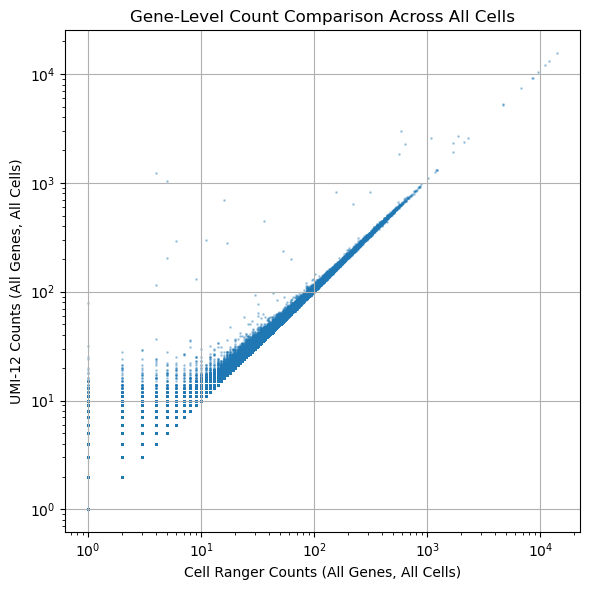

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x_all = []
y_all = []

# Loop through all barcodes in adata_cr_sub
for barcode in adata_cr_sub.obs_names:
    if barcode in adata_12_sub.obs_names:
        # Extract gene-level counts for this cell
        counts_cr = adata_cr_sub[barcode, :].X.toarray().ravel()
        counts_12 = adata_12_sub[barcode, :].X.toarray().ravel()

        # Filter out zero-zero pairs
        nonzero = (counts_cr + counts_12) > 0
        x_all.extend(counts_cr[nonzero])
        y_all.extend(counts_12[nonzero])

# Convert lists to arrays
x_all = np.array(x_all)
y_all = np.array(y_all)

# Plot all points
plt.figure(figsize=(6, 6))
plt.scatter(x_all, y_all, s=1, alpha=0.3)
plt.xlabel("Cell Ranger Counts (All Genes, All Cells)")
plt.ylabel("UMI-12 Counts (All Genes, All Cells)")
plt.xscale('log')
plt.yscale('log')
plt.title("Gene-Level Count Comparison Across All Cells")
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
adata_5 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/adata_5.h5ad")
common_genes = adata_cr.var_names.intersection(adata_5.var_names)
adata_cr_sub = adata_cr[:, common_genes].copy()
adata_5_sub = adata_5[:, common_genes].copy()


/tmp/ipykernel_1192641/4083176592.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/data/dagyeman/miniconda3/envs/af/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


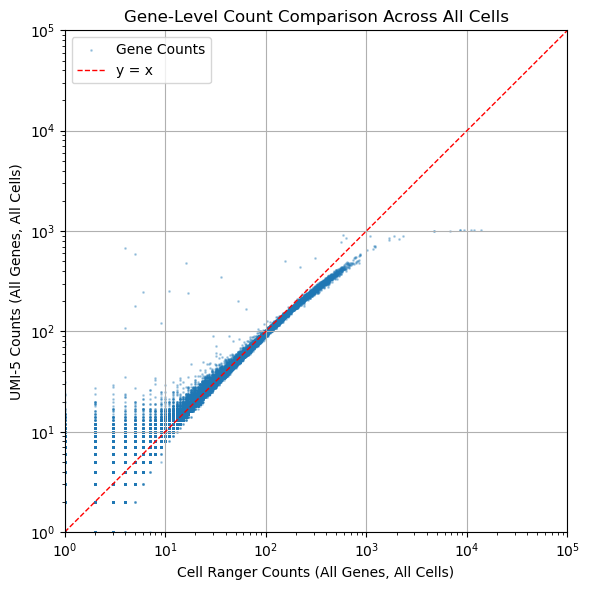

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x_all = []
y_all = []

# Loop through all barcodes in adata_cr_sub
for barcode in adata_cr_sub.obs_names:
    if barcode in adata_5_sub.obs_names:
        # Extract gene-level counts for this cell
        counts_cr = adata_cr_sub[barcode, :].X.toarray().ravel()
        counts_5 = adata_5_sub[barcode, :].X.toarray().ravel()

        # Filter out zero-zero pairs
        nonzero = (counts_cr + counts_5) > 0  # fixed from counts_12
        x_all.extend(counts_cr[nonzero])
        y_all.extend(counts_5[nonzero])

# Convert to arrays
x_all = np.array(x_all)
y_all = np.array(y_all)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x_all, y_all, s=1, alpha=0.3, label='Gene Counts')

# Add y = x reference line
ref_line = np.linspace(1, 1e5, 1000)
plt.plot(ref_line, ref_line, color='red', linestyle='--', linewidth=1, label='y = x')

# Axis and labels
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 1e5)
plt.ylim(1, 1e5)
plt.xlabel("Cell Ranger Counts (All Genes, All Cells)")
plt.ylabel("UMI-5 Counts (All Genes, All Cells)")
plt.title("Gene-Level Count Comparison Across All Cells")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Alevin Stuff 

In [5]:
adata_av = sc.read_h5ad("/data/dagyeman/af_test_workdir/pbmc1k_quant/af_quant/alevin/quants.h5ad")
print(adata_av)

adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/adata_12.h5ad")
adata_12

AnnData object with n_obs × n_vars = 72199 × 36601
    obs: 'barcodes', 'corrected_reads', 'mapped_reads', 'deduplicated_reads', 'mapping_rate', 'dedup_rate', 'mean_by_max', 'num_genes_expressed', 'num_genes_over_mean'
    var: 'gene_id', 'gene_symbol'
    uns: 'collate_info', 'gpl_info', 'quant_info', 'simpleaf_map_info'
    layers: 'ambiguous', 'spliced', 'unspliced'


AnnData object with n_obs × n_vars = 1232 × 28227

In [6]:
adata_av.var_names

Index(['ENSG00000278704', 'ENSG00000274847', 'ENSG00000277400',
       'ENSG00000278198', 'ENSG00000276256', 'ENSG00000273496',
       'ENSG00000277630', 'ENSG00000278384', 'ENSG00000273748',
       'ENSG00000271254',
       ...
       'ENSG00000260197', 'ENSG00000286265', 'ENSG00000278847',
       'ENSG00000277930', 'ENSG00000280961', 'ENSG00000286009',
       'ENSG00000286247', 'ENSG00000286201', 'ENSG00000286130',
       'ENSG00000288057'],
      dtype='object', name='index', length=36601)

In [7]:
adata_12.var_names

Index(['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1', 'A3GALT2',
       'A4GALT', 'AAAS', 'AACS',
       ...
       'ZW10;AP003170.4', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A',
       'ZYG11B', 'ZYX', 'ZZEF1'],
      dtype='object', name='gene', length=28227)

In [8]:
import pandas as pd

# Update this path to the actual one on your machine
gtf_path = "/data/dagyeman/cellranger/refdata-gex-GRCh38-2020-A/genes/genes.gtf"

gene_map = {}

with open(gtf_path, "r") as f:
    for line in f:
        if line.startswith("#"):
            continue
        parts = line.strip().split('\t')
        if parts[2] != "gene":
            continue
        attrs = parts[8].split(';')
        attr_dict = {}
        for attr in attrs:
            if attr.strip():
                key, value = attr.strip().replace('"', '').split(' ')
                attr_dict[key] = value
        ensg_id = attr_dict.get("gene_id")
        gene_name = attr_dict.get("gene_name")
        if ensg_id and gene_name:
            gene_map[ensg_id.split('.')[0]] = gene_name  # Remove version suffix

# Save to CSV
df = pd.DataFrame(list(gene_map.items()), columns=["ensembl_id", "gene_symbol"])
df.to_csv("/data/dagyeman/cellranger/ensembl_to_symbol.csv", index=False)


In [9]:
adata_av = sc.read_h5ad("/data/dagyeman/af_test_workdir/pbmc1k_quant/af_quant/alevin/quants.h5ad")
adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/adata_12.h5ad")


map_df = pd.read_csv("/data/dagyeman/cellranger/ensembl_to_symbol.csv")
ensg_to_symbol = dict(zip(map_df['ensembl_id'], map_df['gene_symbol']))

# Apply mapping to adata_av
adata_av.var_names = adata_av.var_names.map(lambda g: ensg_to_symbol.get(g.split('.')[0], None))

# Remove genes that failed to map
adata_av = adata_av[:, adata_av.var_names.notna()].copy()
adata_av = adata_av[:, ~adata_av.var_names.duplicated()].copy()

/data/dagyeman/miniconda3/envs/af/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [10]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt


# Remove trailing "-1" from adata_12 barcodes
adata_12.obs_names = adata_12.obs_names.str.replace("-1", "", regex=False)

# Now find common barcodes
common_barcodes = adata_12.obs_names.intersection(adata_av.obs_names)
print(common_barcodes)
adata_av_sub = adata_av[common_barcodes].copy()
print(adata_av_sub)
adata_12_sub = adata_12[common_barcodes].copy()
print(adata_12_sub)
# Find common genes
common_genes = adata_12_sub.var_names.intersection(adata_av_sub.var_names)
adata_av_sub = adata_av_sub[:, common_genes].copy()
print(adata_av_sub)
adata_12_sub = adata_12_sub[:, common_genes].copy()
print(adata_12_sub)


# Collect all gene-level counts across all cells
x_all, y_all = [], []
for barcode in adata_12_sub.obs_names:
    x = adata_12_sub[barcode, :].X.toarray().ravel()
    y = adata_av_sub[barcode, :].X.toarray().ravel()
    nonzero = (x + y) > 0
    x_all.extend(x[nonzero])
    y_all.extend(y[nonzero])

# Convert to numpy arrays
x_all = np.array(x_all)

y_all = np.array(y_all)

import matplotlib.pyplot as plt
import numpy as np



Index(['AAACCCAAGGAGAGTA', 'AAACGCTTCAGCCCAG', 'AAAGAACAGACGACTG',
       'AAAGAACCAATGGCAG', 'AAAGAACGTCTGCAAT', 'AAAGGATAGTAGACAT',
       'AAAGGATCACCGGCTA', 'AAAGGATTCAGCTTGA', 'AAAGGATTCCGTTTCG',
       'AAAGGGCTCATGCCCT',
       ...
       'TTTCACATCTCAGGCG', 'TTTCATGGTGCCTAAT', 'TTTCATGTCACTCACC',
       'TTTCCTCCACAGAGCA', 'TTTCCTCTCCTACACC', 'TTTCCTCTCTCTTGCG',
       'TTTGATCTCTTTGGAG', 'TTTGGTTAGTAACCTC', 'TTTGGTTGTAGAATAC',
       'TTTGTTGCAATTAGGA'],
      dtype='object', length=1232)
AnnData object with n_obs × n_vars = 1232 × 36591
    obs: 'barcodes', 'corrected_reads', 'mapped_reads', 'deduplicated_reads', 'mapping_rate', 'dedup_rate', 'mean_by_max', 'num_genes_expressed', 'num_genes_over_mean'
    var: 'gene_id', 'gene_symbol'
    uns: 'collate_info', 'gpl_info', 'quant_info', 'simpleaf_map_info'
    layers: 'ambiguous', 'spliced', 'unspliced'
AnnData object with n_obs × n_vars = 1232 × 28227
AnnData object with n_obs × n_vars = 1232 × 26730
    obs: 'barcodes', 'corr

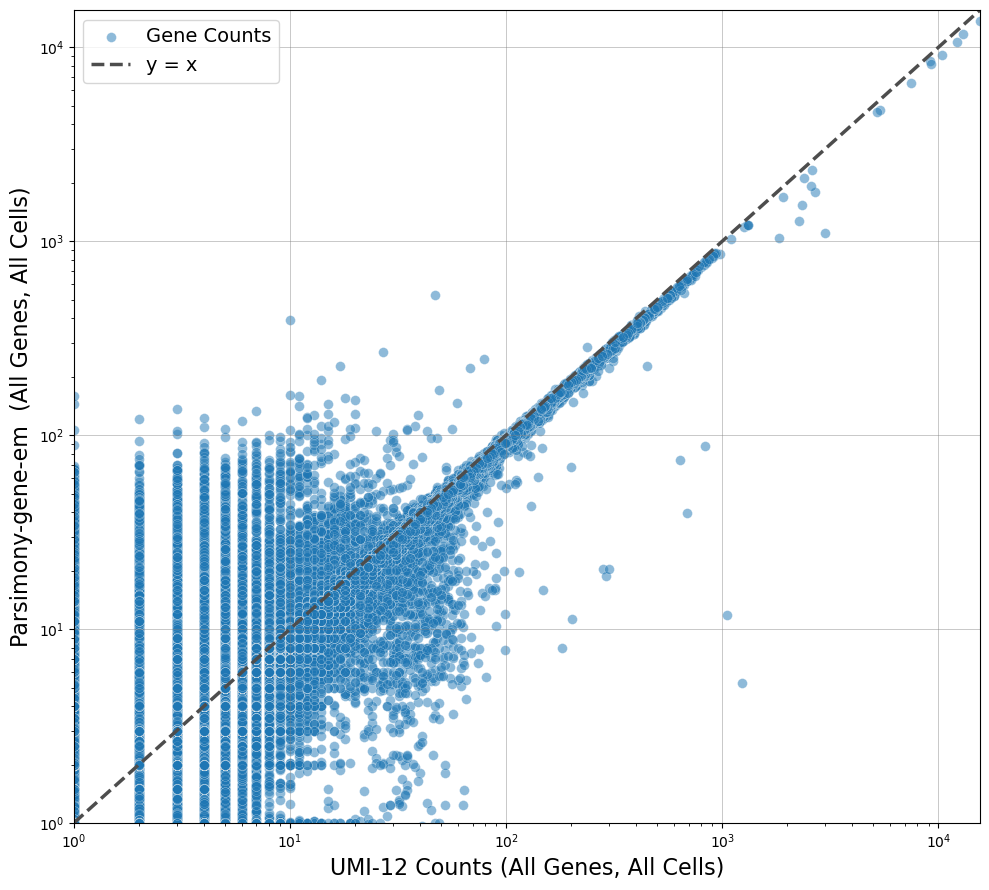

In [12]:
plt.figure(figsize=(10, 9))
plt.scatter(x_all, y_all, alpha=0.5, c='#1f77b4', edgecolors='w', s=50, linewidth=0.3, label='Gene Counts')

max_val = max(np.max(x_all), np.max(y_all))
plt.plot([1, max_val], [1, max_val], linestyle='--', color='#4D4D4D', linewidth=2.5, label='y = x')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('UMI-12 Counts (All Genes, All Cells)', fontsize=16)
plt.ylabel('Parsimony-gene-em  (All Genes, All Cells)', fontsize=16)
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
plt.legend(fontsize=14, loc="upper left")
plt.xlim(1, max_val)
plt.ylim(1, max_val)
plt.tight_layout()
plt.show()


# Hypothesis Testing Stuff

In [ ]:
!

In [1]:
import pysam
import pandas as pd

# Path to the filtered BAM file
filtered_bam_path = '/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/filtered_1k_PBMCS_bam.bam' # filtered path for 1k dataset 
# filtered_bam_path = '/data/dagyeman/cellranger/bam_file_analysis/filtered_10k_PBMCS_bam.bam' # filtered bam path for 10k dataset

# List to store rows of data (barcode, gene, UMI)
data = []

# Open the filtered BAM file for reading
with pysam.AlignmentFile(filtered_bam_path, "rb") as bam_file:
    # Iterate over each read in the BAM file
    for read in bam_file:
        # Check if the read has 'CB' (cell barcode), 'GN' (gene name), and 'UB' (UMI) tags
        if read.has_tag('CB') and read.has_tag('GN') and read.has_tag('UR'):
            # Extract the 'CB' (cell barcode), 'GN' (gene name), and 'UB' (UMI) tags
            barcode = read.get_tag('CB')
            gene = read.get_tag('GN')
            umi = read.get_tag('UR')
            
            # Append the row to the data list
            data.append([barcode, gene, umi])

# Convert the list into a pandas DataFrame
df = pd.DataFrame(data, columns=['barcode', 'gene', 'UMI'])

# Show the first few rows of the DataFrame
print(df.head())

              barcode        gene           UMI
0  GCTGCAGGTTGACGGA-1  AL627309.1  ATGAATTCGTTT
1  GCTGCAGGTTGACGGA-1  AL627309.1  ATGAATTCGTTT
2  CTGCCTATCTTGATTC-1  AL627309.1  CGGGTACTGCGC
3  GCGAGAAAGTTGTAGA-1  AL627309.1  TTGTAAAATACG
4  GGTCTGGTCAGACATC-1  AL627309.1  GGAAATCTGCGT


In [2]:
import pandas as pd

# Filter out UMIs that contain 'N'
df = df[~df['UMI'].str.contains('N')]


In [3]:
# Loop through shortened UMI lengths from 1 to 12
for k in range(1, 13):
    # Shorten the 'UMI' to the first 'k' bases
    df[f'UMI_{k}'] = df.UMI.str[:k]
    
    # Group by 'barcode' and 'gene' and count the number of unique shortened UMIs for each combination
    grouped_df = df.groupby(['barcode', 'gene'])[f'UMI_{k}'].nunique().reset_index()
    
    # Rename the column to reflect that it's counting unique UMIs of length 'k'
    grouped_df.rename(columns={f'UMI_{k}': f'unique_UMI_count_{k}'}, inplace=True)
    
    # Optionally, you can store the resulting DataFrame for each 'k' or print the first few rows
    print(f"Unique UMI counts for UMI length {k}:")
    print(grouped_df.head())

# Example: To merge results across different lengths (optional)
# Merging results for all k values across lengths 1-12 into one DataFrame (if needed)
final_df = df.groupby(['barcode', 'gene']).agg({f'UMI_{k}': 'nunique' for k in range(1, 13)}).reset_index()

# Rename the columns accordingly to reflect the unique UMI counts for each length
final_df.columns = ['barcode', 'gene'] + [f'unique_UMI_count_{k}' for k in range(1, 13)]

# Show the first few rows of the final merged DataFrame
print(final_df.head())

Unique UMI counts for UMI length 1:
              barcode   gene  unique_UMI_count_1
0  AAACCCAAGGAGAGTA-1   AAK1                   3
1  AAACCCAAGGAGAGTA-1   AAMP                   2
2  AAACCCAAGGAGAGTA-1   AATK                   1
3  AAACCCAAGGAGAGTA-1   ABAT                   2
4  AAACCCAAGGAGAGTA-1  ABCB7                   2
Unique UMI counts for UMI length 2:
              barcode   gene  unique_UMI_count_2
0  AAACCCAAGGAGAGTA-1   AAK1                   4
1  AAACCCAAGGAGAGTA-1   AAMP                   2
2  AAACCCAAGGAGAGTA-1   AATK                   1
3  AAACCCAAGGAGAGTA-1   ABAT                   2
4  AAACCCAAGGAGAGTA-1  ABCB7                   2
Unique UMI counts for UMI length 3:
              barcode   gene  unique_UMI_count_3
0  AAACCCAAGGAGAGTA-1   AAK1                   4
1  AAACCCAAGGAGAGTA-1   AAMP                   2
2  AAACCCAAGGAGAGTA-1   AATK                   1
3  AAACCCAAGGAGAGTA-1   ABAT                   2
4  AAACCCAAGGAGAGTA-1  ABCB7                   2
Unique UMI

In [4]:
k = 12
# create a k-base UMI column
df[f'UMI_{k}'] = df['UMI'].str[:k]

# now dedupe on that trimmed UMI, not the full one
unique_df_k = df.drop_duplicates(subset=['barcode','gene',f'UMI_{k}'])
print(f"Rows after deduplication (k={k}): {len(unique_df_k)}")


Rows after deduplication (k=12): 15568370


In [5]:
umi_cell_counts_k = (
    unique_df_k
    .groupby(['gene', f'UMI_{k}'])
    .size()
    .reset_index(name='cell_count')
)
umi_cell_counts_k.head()

,gene,UMI_12,cell_count
0,A1BG,AAACTCACTGAG,1
1,A1BG,AAACTCCTTAGG,1
2,A1BG,AAATACTAGGAT,1
3,A1BG,AAATGTCACCCA,1
4,A1BG,AAATTATCGTCC,1


In [ ]:
# Compute total UMI–cell appearances per gene
gene_totals_k = (
    umi_cell_counts_k
    .groupby('gene')['cell_count']
    .sum()
)

# Sort descending and take top 30
top30_genes = gene_totals_k.sort_values(ascending=False).head(30).index.tolist()

print("Top 30 genes by total UMI cell appearances:")
for i, g in enumerate(top30_genes, 1):
    print(f"{i:2d}. {g} ({gene_totals_k[g]} total appearances)")

In [ ]:
## Plotting “Cells per UMI” Distributions for Multiple Genes

import matplotlib.pyplot as plt
import numpy as np

# List of genes to plot
top_genes = [
    'MALAT1',   # 379868 total appearances
    'MT-CO1',   # 203370 total appearances
    'MT-CO3',   # 185662 total appearances
    'MT-CO2',   # 147109 total appearances
    'MT-ATP6',  # 126052 total appearances
    'EEF1A1',   # 119826 total appearances
    'MT-ND3'    # 96831 total appearances
]

# Number of columns for subplot grid
ncols = 3
nrows = int(np.ceil(len(top_genes) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows), sharey=True)

for ax, gene in zip(axes.flatten(), top_genes):
    counts = umi_cell_counts_k.loc[umi_cell_counts_k['gene'] == gene, 'cell_count']
    ax.hist(
        counts,
        bins=np.arange(1, counts.max() + 2),
        edgecolor='k'
    )
    ax.set_title(f"{gene} (k={k})")
    ax.set_xlabel("Cells per UMI")
    ax.set_ylabel("Number of UMIs")
    ax.set_yscale('log')

# Turn off any unused subplots
for empty_ax in axes.flatten()[len(top_genes):]:
    empty_ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# For each gene, print its top 10 UMIs by cell_count
for gene in top_genes:
    top_umis = (
        umi_cell_counts_k[umi_cell_counts_k['gene'] == gene]
        .nlargest(10, 'cell_count')      # sort descending by cell_count
        .reset_index(drop=True)
    )
    print(f"\nGene {gene} – Top 10 UMIs (k={k}):")
    print(top_umis[['UMI_' + str(k), 'cell_count']])


In [ ]:
# 1) Collect all top-10 UMIs into one DataFrame
records = []
for gene in top_genes:
    top_umis = (
        umi_cell_counts_k[umi_cell_counts_k['gene'] == gene]
        .nlargest(10, 'cell_count')
    )
    for _, row in top_umis.iterrows():
        records.append({
            'gene': gene,
            'UMI': row[f'UMI_{k}'],
            'cell_count': row['cell_count']
        })

top10_df = pd.DataFrame(records)

# 2) Find UMIs appearing in more than one gene’s top-10
shared = (
    top10_df
    .groupby('UMI')
    .agg({
        'gene': lambda gs: list(gs),
        'cell_count': lambda cs: list(cs)
    })
    .reset_index()
)

shared = shared[shared['gene'].map(len) > 1]

# 3) Print shared UMIs with their genes and counts
if shared.empty:
    print("No UMIs are shared among the top-10 lists of multiple genes.")
else:
    print("Shared UMIs across top-10 lists:")
    for _, row in shared.iterrows():
        umi_seq = row['UMI']
        pairs = ", ".join(f"{g}({c})" for g, c in zip(row['gene'], row['cell_count']))
        print(f"UMI {umi_seq!r} → {pairs}")

## More Analysis

In [ ]:

k_small, k_full = 5, 12
cands = final_df[
    (final_df[f'unique_UMI_count_{k_small}'] == 1) &
    (final_df[f'unique_UMI_count_{k_full}']  > 700)
]

for _, row in cands.iterrows():
    cell, gene = row['barcode'], row['gene']
    umis12 = unique_df_k[
        (unique_df_k['barcode'] == cell) &
        (unique_df_k['gene']    == gene)
    ]['UMI_12'].unique().tolist()
    
    print(f"\n{cell}–{gene}: k=5 count=1, k=12 count={len(umis12)} UMIs → {umis12}")


### 100 cell-gene pairs

In [ ]:
!

In [32]:
import random
from itertools import combinations

def hamming(a, b):
    return sum(x != y for x, y in zip(a, b))

def fraction_hd1(umi_list):
    """Compute fraction of UMI pairs with Hamming distance = 1."""
    total = 0
    hd1 = 0
    for a, b in combinations(umi_list, 2):
        total += 1
        if hamming(a, b) == 1:
            hd1 += 1
    return hd1 / total if total else 0

# Step 1: Select 100 random (cell, gene) pairs with UMI_12 count between 390 and 410
k_full = 12
lower, upper = 390, 410

eligible = final_df[
    (final_df[f'unique_UMI_count_{k_full}'] >= lower) &
    (final_df[f'unique_UMI_count_{k_full}'] <= upper)
]

cands = eligible.sample(n=min(100, len(eligible)), random_state=42)

num_available = len(eligible)
print(f"Number of cell-gene pairs with UMI_{k_full} count between {lower} and {upper}: {num_available}")


Number of cell-gene pairs with UMI_12 count between 390 and 410: 97


In [33]:
from itertools import combinations
from scipy.spatial.distance import hamming

def fraction_hd1_or_hd2(umi_list):
    """Compute the fraction of UMI pairs with Hamming distance 1 or 2."""
    total = 0
    hd1_or_2 = 0
    for a, b in combinations(umi_list, 2):
        dist = hamming(list(a), list(b)) * len(a)
        total += 1
        if dist in {1, 2}:
            hd1_or_2 += 1
    return hd1_or_2 / total if total else 0

# Step 2: For each selected (cell, gene) pair, compute fraction at Hamming distance 1 or 2
results = []
for _, row in cands.iterrows():
    cell, gene = row['barcode'], row['gene']
    umis = unique_df_k[
        (unique_df_k['barcode'] == cell) &
        (unique_df_k['gene'] == gene)
    ]['UMI_12'].unique().tolist()

    hd_frac = fraction_hd1_or_hd2(umis)
    results.append({
        'cell': cell,
        'gene': gene,
        'umi_count': len(umis),
        'hd1_or_2_frac': hd_frac
    })

# Convert to DataFrame
import pandas as pd
hd_df = pd.DataFrame(results)


In [34]:
hd_df

,cell,gene,umi_count,hd1_or_2_frac
0,GTAGCTATCTCATGGA-1,S100A9,404,0.000626
1,CCTGCATGTTCTTAGG-1,MALAT1,409,0.000527
2,TTGCTGCCATTGCCGG-1,MT-CO1,407,0.000363
3,ATGACCAAGGCTAACG-1,MT-CO1,398,0.000506
4,TGGGCTGAGCGTTAGG-1,MT-CO1,406,0.000499
...,...,...,...,...
92,GGGCTACAGGCAGTCA-1,MALAT1,404,0.000516
93,TCAGCAAGTATGACAA-1,MALAT1,398,0.000557
94,ATCCACCCAGCAGTGA-1,MALAT1,393,0.000467
95,TTGCCTGAGTGGAAAG-1,S100A9,408,0.000747


### Null sample

In [35]:
import random
from itertools import combinations

def hamming(a, b):
    return sum(x != y for x, y in zip(a, b))

def fraction_hd1(umi_list):
    total = 0
    hd1 = 0
    for a, b in combinations(umi_list, 2):
        total += 1
        if hamming(a, b) == 1:
            hd1 += 1
    return hd1 / total if total else 0

# Extract all unique UMI_12s from the dataset
all_umis = unique_df_k['UMI_12'].unique().tolist()

# Randomly sample 400 UMIs from the entire pool
sampled_umis = random.sample(all_umis, 400)

# Compute Hamming distance = 1 fraction
null_hd1_fraction = fraction_hd1(sampled_umis)

print(f"Null sample (400 random UMIs) HD=1 fraction: {null_hd1_fraction:.4f}")


Null sample (400 random UMIs) HD=1 fraction: 0.0000


In [36]:
p_value_400 = p_value_10 = (sum(hd_df['hd1_or_2_frac'] <= null_hd1_fraction) + 1) / (len(hd_df) + 1)
p_value_400

0.01020408163265306

## Doing it for UMIs 5-15 

In [18]:
import random
from itertools import combinations

def hamming(a, b):
    return sum(x != y for x, y in zip(a, b))

def fraction_hd1(umi_list):
    """Compute fraction of UMI pairs with Hamming distance = 1."""
    total = 0
    hd1 = 0
    for a, b in combinations(umi_list, 2):
        total += 1
        if hamming(a, b) == 1:
            hd1 += 1
    return hd1 / total if total else 0

# Step 1: Select 100 random (cell, gene) pairs with UMI_12 count between 390 and 410
k_full = 12
lower, upper = 5, 15

eligible = final_df[
    (final_df[f'unique_UMI_count_{k_full}'] >= lower) &
    (final_df[f'unique_UMI_count_{k_full}'] <= upper)
]

cands = eligible.sample(n=min(100, len(eligible)), random_state=42)

num_available = len(eligible)
print(f"Number of cell-gene pairs with UMI_{k_full} count between {lower} and {upper}: {num_available}")

Number of cell-gene pairs with UMI_12 count between 5 and 15: 450101


In [19]:
from itertools import combinations
from scipy.spatial.distance import hamming

def fraction_hd1_or_hd2(umi_list):
    """Compute the fraction of UMI pairs with Hamming distance 1 or 2."""
    total = 0
    hd1_or_2 = 0
    for a, b in combinations(umi_list, 2):
        dist = hamming(list(a), list(b)) * len(a)
        total += 1
        if dist in {1, 2}:
            hd1_or_2 += 1
    return hd1_or_2 / total if total else 0

# Step 2: For each selected (cell, gene) pair, compute fraction at Hamming distance 1 or 2
results = []
for _, row in cands.iterrows():
    cell, gene = row['barcode'], row['gene']
    umis = unique_df_k[
        (unique_df_k['barcode'] == cell) &
        (unique_df_k['gene'] == gene)
    ]['UMI_12'].unique().tolist()

    hd_frac = fraction_hd1_or_hd2(umis)
    results.append({
        'cell': cell,
        'gene': gene,
        'umi_count': len(umis),
        'hd1_or_2_frac': hd_frac
    })

# Convert to DataFrame
import pandas as pd
hd_df = pd.DataFrame(results)


In [20]:
hd_df

,cell,gene,umi_count,hd1_or_2_frac
0,CTGTGAATCATCGCTC-1,SNHG5,6,0.066667
1,TGTTTGTGTGGAAATT-1,UBL5,5,0.000000
2,TCGTGCTGTGATCATC-1,HINT1,7,0.000000
3,TGTGCGGTCACATACG-1,JMJD1C,12,0.000000
4,TAAGCCATCTGGCCTT-1,TBC1D5,7,0.047619
...,...,...,...,...
95,GTGTCCTCAGTTGTTG-1,ATP5MC2,6,0.000000
96,TTGCCTGAGTGGAAAG-1,IQSEC1,5,0.100000
97,GTAATGCCACCAGTAT-1,LMBR1,8,0.000000
98,TGAGCATTCCTTCACG-1,PDK3,6,0.133333


### Null sample (5-15)

In [25]:
import random
from itertools import combinations

def hamming(a, b):
    return sum(x != y for x, y in zip(a, b))

def fraction_hd1(umi_list):
    total = 0
    hd1 = 0
    for a, b in combinations(umi_list, 2):
        total += 1
        if hamming(a, b) == 1:
            hd1 += 1
    return hd1 / total if total else 0

# Extract all unique UMI_12s from the dataset
all_umis = unique_df_k['UMI_12'].unique().tolist()

# Randomly sample 400 UMIs from the entire pool
sampled_umis = random.sample(all_umis, 10)

# Compute Hamming distance = 1 fraction
null_hd1_fraction = fraction_hd1(sampled_umis)

print(f"Null sample (400 random UMIs) HD=1 fraction: {null_hd1_fraction:.6f}")

Null sample (400 random UMIs) HD=1 fraction: 0.000000


In [27]:
p_value_10 = (sum(hd_df['hd1_or_2_frac'] <= null_hd1_fraction) + 1) / (len(hd_df) + 1)
p_value_10

0.5742574257425742

In [2]:
import scanpy as sc

# Load matrix
adata = sc.read_mtx("counts.mtx").T  # Transpose to make shape (cells, genes)

# Assign variable (gene) names and observation (cell) names
adata.var_names = [line.strip() for line in open("genes.tsv")]
adata.obs_names = [line.strip() for line in open("barcodes.tsv")]

# Save as .h5ad
adata.write("pbmc_dropest.h5ad")


In [4]:
print(adata)

adata.obs_names

Index(['GGCAATGGCATTCTAGTGCCGGTT', 'TTTGGGTAGCCATGGTCGCGTTTC',
       'ACATTACTTACAACGAGGCCTGAA', 'ACATTACTAGGAGGTAGGTCACAG',
       'CAGCCCACAATCACGAGGCTCTAT', 'TTTGGGTATGCGATAAGACTCGCG',
       'GGCAATGGATGGGAGTCCACTGAG', 'CAGCCCACCTTTCGGGTTCGGTTA',
       'ACATTACTAGTACTGGTATCGCGC', 'GGCAATGGGGTTAACTCACTCACC',
       ...
       'TTTGGGTATATCTTGTCCATCTCG', 'CAGCCCACTATCTTGTCCATCTCG',
       'GGCAATGGCGAGAAGTCAAGTTGC', 'TTTGGGTACGAGAAGTCAAGTTGC',
       'ACATTACTCGAGAAGTCAAGTTGC', 'CAGCCCACCGAGAAGTCAAGTTGC',
       'GGCAATGGGATCACACACCCTGTT', 'ACATTACTGATCACACACCCTGTT',
       'TTTGGGTAGATCACACACCCTGTT', 'CAGCCCACGATCACACACCCTGTT'],
      dtype='object', length=4883)